## Habermans Survival dataset

Dataset: habermans Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set/data]

### 1.Intial statstics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load habermans.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")



In [3]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [27]:
#(Q) What are the column names in our dataset?
print (haberman.columns)
print (haberman.info())
print (haberman.head(1))
print (haberman.tail(1))

Index(['age', 'year', 'nodes', 'status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None
   age  year  nodes  status
0   30    64      1       1
     age  year  nodes  status
305   83    58      2       2


In [3]:
#(Q) How many data points for each class are present? 

print(haberman["status"].value_counts())
print(haberman["status"].value_counts(normalize=True))
print('*'*100)
#mapping 1 to yes and 2 to no for class label
haberman["status"]=haberman["status"].map({1:"yes",2:"no"})
#converting calss label to categeorical type
#haberman["status"]=haberman["status"].astype('category')

print(haberman.describe())


1    225
2     81
Name: status, dtype: int64
1    0.735294
2    0.264706
Name: status, dtype: float64
****************************************************************************************************
              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


#### observations

1.haberman dataset has 306 datapoints indexing from 0 to 305
2.It has 4 columns of numerical data in which three are features and one is class label(status)
3.It is an imbalanced dataset as the number of data points for  class status has 225 data poinnts for status 1 and 81 datapoints for status 2 and 73.5% has survial rate who can live longer than 5 years after operation
4.There are no missing values in dataset


#### Objective
To find the survival rate after 5 years of operation based on age, year of op,nodes


### 2. 2-D Scatter plots(Bi-variate analysis)

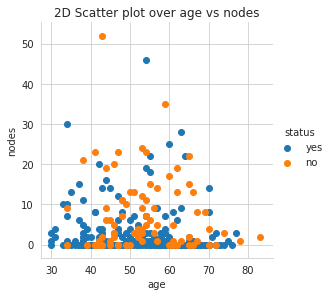

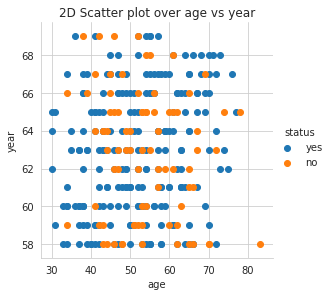

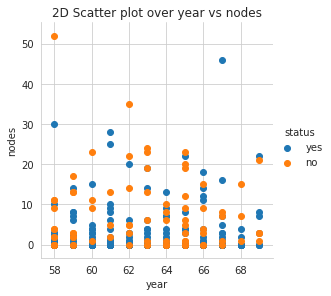

In [5]:

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2D Scatter plot over age vs nodes')
plt.show();
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('2D Scatter plot over age vs year')
plt.show();
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title('2D Scatter plot over year vs nodes')
plt.show();

### Observations:

1. when age is greater than 80 the status to survive is "no"
2.when age is less than 30 and and nodes are less than 10 there is 100% survival rate
3.combinations is 3c2=6
4.All the red and blue poiints are mostly overlapped in all the 2D-combinations of feature

### 3.Pair-plot(Bi-variate analysis)

/home/chandrika/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


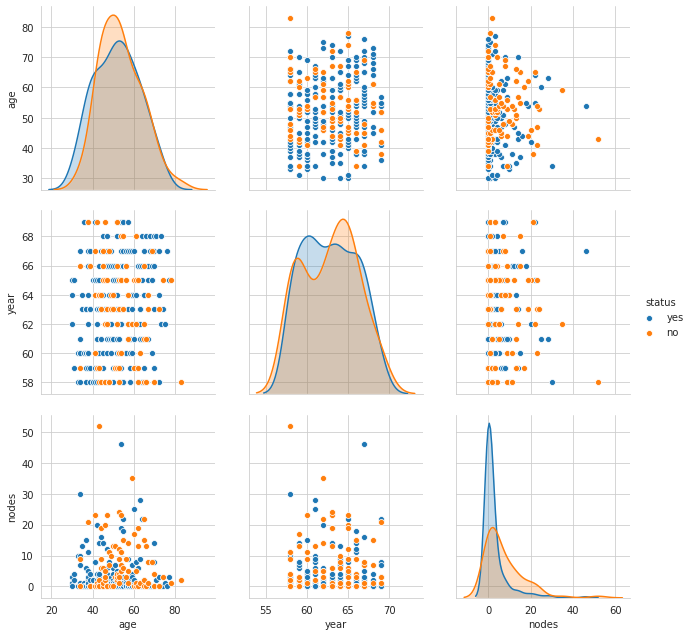

In [33]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations** :1. when age is greater than 80 the status to survive is no

2.when age is less than 30 and and nodes are less than 10 there is 100% survival rate

3.combinations is 3c2=6

4.All the red and blue poiints are mostly overlapped

5.Here when compared to age and year, nodes are better userful than other features

6.usefulness: nodes>year>age
**Limitations of pairplots**
1.when dimensions increases the no of plots we nedd to analyse will increase
as dc2

### 4. Histogram, PDF, CDF(Univariate analysis)
#### 4.1 1-D plot and Distribution plot and density analysis

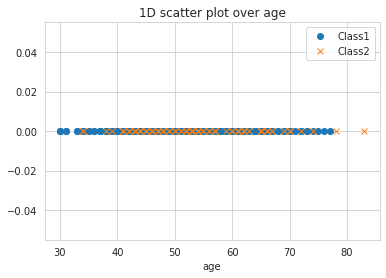

In [42]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of age
import numpy as np
class1= haberman.loc[haberman["status"] == "yes"];
class2 = haberman.loc[haberman["status"] ==  "no"];
#print(class1)
plots=[]
plot1=plt.plot(class1["age"], np.zeros_like(class1['age']), 'o',label='Class1')
plot2=plt.plot(class2["age"], np.zeros_like(class2['age']), 'x',label='Class2')
#plt.plot(plot1,plot2)
plots.append(plot1)
plots.append(plot2)
plt.title('1D scatter plot over age')
plt.xlabel('age')


#plt.figlegend(plots,)
plt.legend()

plt.show()


# from age 1-D plot we can observe that age<=30 has 100% survival rate and age>80 has 0% survival rate

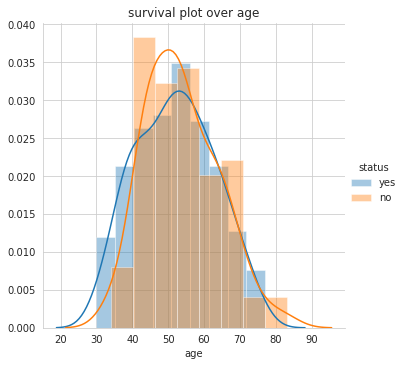

In [56]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('survival plot over age')
plt.show();

#density plot

**Observations**
1.people below 40 are more likely to survive
2.peple between 40 to 60 are more likely to die
3.people above 80 will not survive

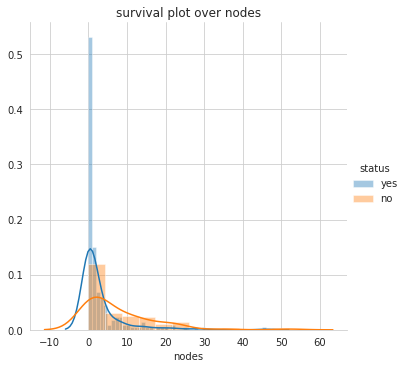

In [58]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('survival plot over nodes')
plt.show();

#density plot

**Observations**
1.people who have nodes 0 will survive
2.people who have node >30 will die



#### 4.2  PDF and CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


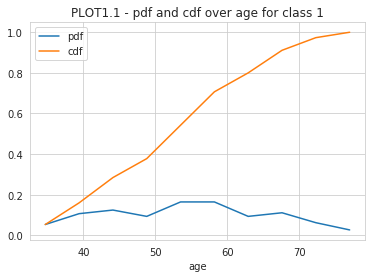

In [45]:

counts, bin_edges = np.histogram(class1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plots=[]
plot1=plt.plot(bin_edges[1:],pdf,label='pdf')
plot2=plt.plot(bin_edges[1:], cdf,label='cdf')
plots.append(plot1)
plots.append(plot2)
plt.title("PLOT1.1 - pdf and cdf over age for class 1")
#plt.figlegend(plots)
plt.legend()
plt.xlabel('age')
'''plt.figlegend(
    handles=(plots),
    labels=('label1', 'label2'),
    loc='upper right')
    '''
plt.show();


**observations**


1. people with age age<=60 has survival rate 72%
2. people with age age<=70 has survival rate 90%


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


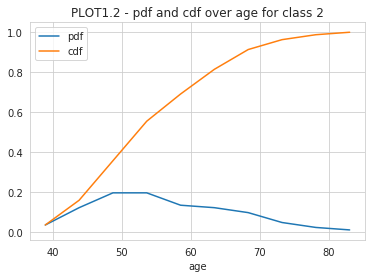

In [46]:

counts, bin_edges = np.histogram(class2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.title("PLOT1.2 - pdf and cdf over age for class 2")
plt.legend()
plt.xlabel('age')
plt.show();


**observations**

74% of patients has died less than 5 years with age<=60


[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


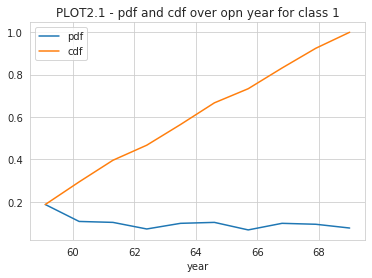

In [47]:

counts, bin_edges = np.histogram(class1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.title("PLOT2.1 - pdf and cdf over opn year for class 1")
plt.legend()
plt.xlabel('year')
plt.show();


**observations**

1. it is observed that 60% of patients survied has done operation less than 1664

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


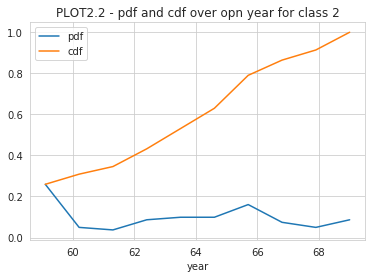

In [49]:

counts, bin_edges = np.histogram(class2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.title("PLOT2.2 - pdf and cdf over opn year for class 2")
plt.legend()
plt.xlabel('year')
plt.show();


**observations**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


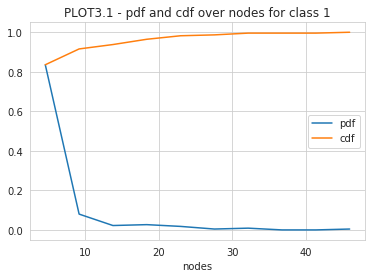

In [50]:

counts, bin_edges = np.histogram(class1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.title("PLOT3.1 - pdf and cdf over nodes for class 1")
plt.legend()
plt.xlabel('nodes')
plt.show();


**observations**

It is observed that 90% of patints survied who had nodes <=10
As nodes are increasing survial rate decreasing

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


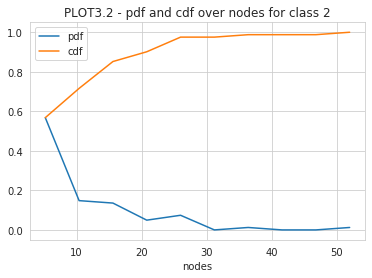

In [51]:

counts, bin_edges = np.histogram(class2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.title("PLOT3.2 - pdf and cdf over nodes for class 2")
plt.legend()
plt.xlabel('nodes')
plt.show();


**observations**

more than 90% of patients of died less than 5 who has nodes<=30

### 5 Box plot and Whiskers(Univariate analysis)

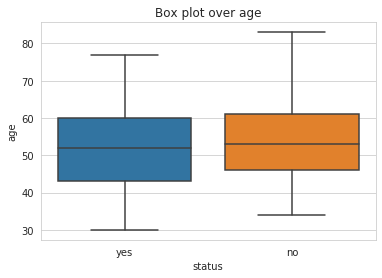

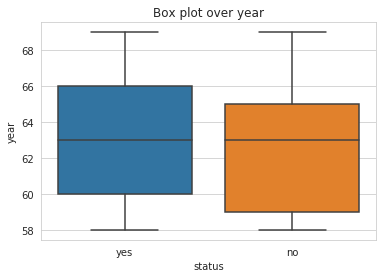

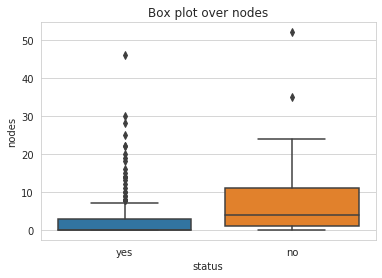

In [84]:

sns.boxplot(x='status',y='age', data=haberman)
#plt.grid()
plt.title('Box plot over age')
plt.show()

sns.boxplot(x='status',y='year', data=haberman)
#plt.grid()
plt.title('Box plot over year')
plt.show()

sns.boxplot(x='status',y='nodes', data=haberman)
#plt.grid()
plt.title('Box plot over nodes')
plt.show()

**observations**

1.It is observed that medians of box plots over age and year are mostly overlapped, so age and year are not sufficient to distinguish he data
2.By the feature of nodes, it is observed that people who have no nodes are survied and survial rate is onversly proportional to no.of.node

### 6.Violin plots(Univariate analysis)

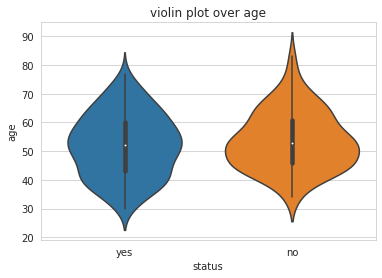

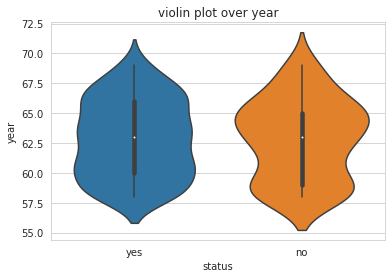

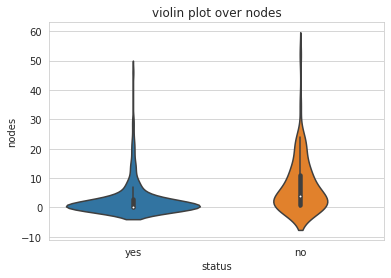

In [85]:


sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title('violin plot over age')
plt.show()
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.title('violin plot over year')
plt.show()
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title('violin plot over nodes')
plt.show()

**observations**

1.It is observed that medians of box plots over age and year are mostly overlapped, so age and year are not sufficient to distinguish he data
2.By the feature of nodes, it is observed that people who have no nodes are survied and survial rate is onversly proportional to no.of.node